<a href="https://colab.research.google.com/github/MKA-ML/ML-Task-1/blob/main/Group_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.optimizer_v2.adam import Adam
import seaborn as sns
from keras.models import Sequential
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from keras.layers import Dense, BatchNormalization,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor

In [54]:
df = pd.read_csv("/content/Housing Prcing.csv")
print(df.shape)
df.head(9)

(1460, 77)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900


In [55]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [56]:
#Filling in missing data: replace nan values with 0
df.fillna(0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [57]:
#Drop columns with single values
count = df.nunique()
to_del = [i for i, v in enumerate(count) if v == 1]
print(to_del)
df.drop(to_del, axis=1,inplace=True)

[]


Skew value :  1.8828757597682129


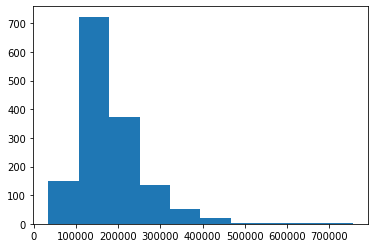

In [58]:
print("Skew value : ", df.SalePrice.skew())
plt.hist(df.SalePrice)
plt.show()

Skew value :  0.12133506220520406


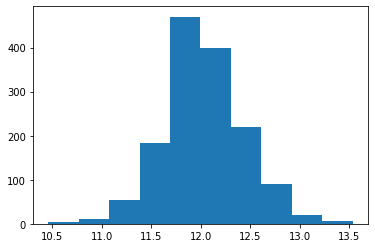

In [59]:
#nplog transforms data and improves the skew
target = np.log(df.SalePrice)
print("Skew value : ", target.skew())
plt.hist(target)
plt.show()

In [60]:
#Defining array od datatypes to use (numerics)
numerics = ['int16','int32','int64','float16','float32','float64']
numerical_vars = list(df.select_dtypes(include=numerics).columns)
df = df[numerical_vars]
df = df.fillna(0)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [61]:
df.values

array([[1.00000e+00, 6.00000e+01, 6.50000e+01, ..., 2.00000e+00,
        2.00800e+03, 2.08500e+05],
       [2.00000e+00, 2.00000e+01, 8.00000e+01, ..., 5.00000e+00,
        2.00700e+03, 1.81500e+05],
       [3.00000e+00, 6.00000e+01, 6.80000e+01, ..., 9.00000e+00,
        2.00800e+03, 2.23500e+05],
       ...,
       [1.45800e+03, 7.00000e+01, 6.60000e+01, ..., 5.00000e+00,
        2.01000e+03, 2.66500e+05],
       [1.45900e+03, 2.00000e+01, 6.80000e+01, ..., 4.00000e+00,
        2.01000e+03, 1.42125e+05],
       [1.46000e+03, 2.00000e+01, 7.50000e+01, ..., 6.00000e+00,
        2.00800e+03, 1.47500e+05]])

In [64]:
#Spliting data into dependent (Y) and independent (X) datasets
X = df.iloc[:,0:37]
Y = df.iloc[:,37]
Y,X

(0       208500
 1       181500
 2       223500
 3       140000
 4       250000
          ...  
 1455    175000
 1456    210000
 1457    266500
 1458    142125
 1459    147500
 Name: SalePrice, Length: 1460, dtype: int64,
         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
 0        1          60         65.0     8450            7            5   
 1        2          20         80.0     9600            6            8   
 2        3          60         68.0    11250            7            5   
 3        4          70         60.0     9550            7            5   
 4        5          60         84.0    14260            8            5   
 ...    ...         ...          ...      ...          ...          ...   
 1455  1456          60         62.0     7917            6            5   
 1456  1457          20         85.0    13175            6            6   
 1457  1458          70         66.0     9042            7            9   
 1458  1459          20     

In [72]:
#Seperate training and test datasets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1022, 37), (438, 37), (1022,), (438,))

In [74]:
#Scaling dataset using MinMaxScaler()
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train.head(3),X_scale

(      Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
 229  230         120         43.0     3182            7            5   
 354  355          50         60.0     8400            6            5   
 874  875          50         52.0     5720            5            6   
 
      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
 229       2005          2006        16.0          16  ...         430   
 354       1940          2000         0.0         388  ...         240   
 874       1941          1950         0.0           0  ...         200   
 
      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
 229         143           20              0          0            0         0   
 354           0            0            108          0            0         0   
 874          26            0              0          0            0         0   
 
      MiscVal  MoSold  YrSold  
 229        0       5    2009  
 354        0 

In [75]:
#Scaling Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
229,230,120,43.0,3182,7,5,2005,2006,16.0,16,...,430,143,20,0,0,0,0,0,5,2009
354,355,50,60.0,8400,6,5,1940,2000,0.0,388,...,240,0,0,108,0,0,0,0,6,2006
874,875,50,52.0,5720,5,6,1941,1950,0.0,0,...,200,26,0,0,0,0,0,0,8,2009


In [76]:
#Building Model
adam = Adam()

In [78]:
model = Sequential()
model.add(Dense(32,activation='relu',input_dim=37))
model.add(Dense(32,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1,activation='softmax'))

In [88]:
#How well does the model perform
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [89]:
#Model Training
hist = model.fit(X_train,Y_train,batch_size=32,epochs=100,)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: -184937360.0000 - accuracy: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: -1446834560.0000 - accuracy: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: -5584576000.0000 - accuracy: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: -20568596480.0000 - accuracy: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: -65841373184.0000 - accuracy: 0.0000e+00
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: -175805808640.0000 - accuracy: 0.0000e+00
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: -399511388160.0000 - accuracy: 0.0000e+00
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: -798787960832.0000 - accuracy: 0.0000e+00
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: -1453832404992.0

In [90]:
model.evaluate(X_test,Y_test)[1]

14/14 [==============================] - 0s 2ms/step - loss: -25496643855974400.0000 - accuracy: 0.0000e+00


0.0

In [91]:
prediction = model.predict(X_test)
prediction.shape

(438, 1)

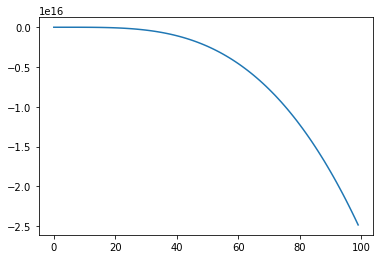

In [92]:
#Is there overfitting?
plt.plot(hist.history['loss'])

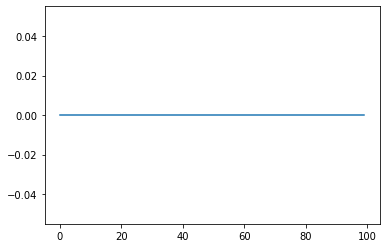

In [93]:
plt.plot(hist.history['accuracy'])

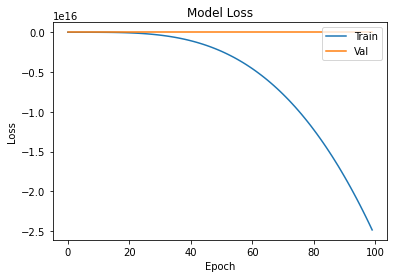

In [99]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper right')